# QUESTION 1 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [2]:
# data loading
df = pd.read_csv(r"D:\1.PHUONG-USQ\CSC8003-Machine Learning\Assignment 2\Q1.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


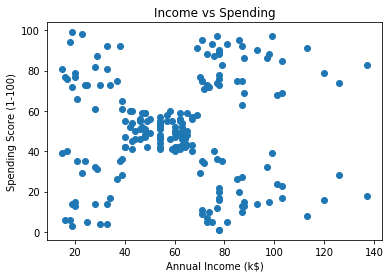

In [3]:
# visualize the Income vs Spending distribution

plt.figure()
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending')
plt.show()

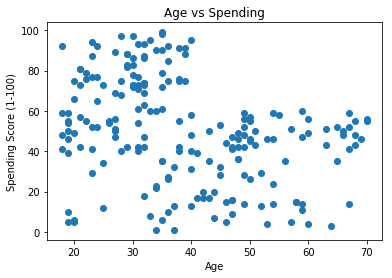

In [4]:
# visualize the Age vs Spending distribution

plt.figure()
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending')
plt.show()

In [5]:
# identify a pair of training features
customer_data = df.iloc[:, 3:5].values

# Dendrogram

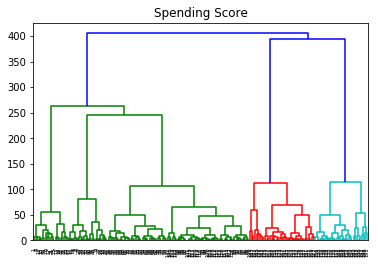

In [6]:
# plot the dendrogram

plt.figure()
plt.title("Spending Score")
dgram = shc.dendrogram(shc.linkage(customer_data, method='ward'))

'''
DENDROGRAM
If we draw a horizontal line that passes through longest distance 
without a horizontal line, we get 5 clusters

'''

# Agglomerative clustering model

In [7]:
model1 = AgglomerativeClustering(linkage='ward', n_clusters=5)
model1.fit(customer_data)
label_pred1 = model1.labels_

In [8]:
np.unique(label_pred1)

array([0, 1, 2, 3, 4], dtype=int64)

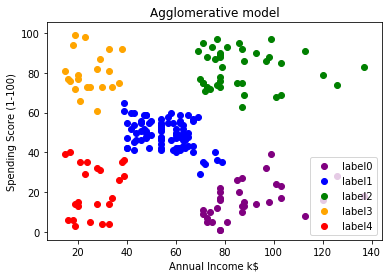

In [9]:
# Plot the clustering result

x0 = customer_data[label_pred1 == 0]
x1 = customer_data[label_pred1 == 1]
x2 = customer_data[label_pred1 == 2]
x3 = customer_data[label_pred1 == 3]
x4 = customer_data[label_pred1 == 4]

plt.scatter(x0[:, 0], x0[:, 1], c="purple", label='label0') 
plt.scatter(x1[:, 0], x1[:, 1], c="blue", label='label1') 
plt.scatter(x2[:, 0], x2[:, 1], c="green", label='label2') 
plt.scatter(x3[:, 0], x3[:, 1], c="orange", label='label3')
plt.scatter(x4[:, 0], x4[:, 1], c="red", label='label4')

plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative model")
plt.legend(loc=4)
plt.show()

In [10]:
print("Numbers of samples in each cluster：")
print(pd.Series(model1.labels_).value_counts().sort_values())

Numbers of samples in each cluster：
3    21
4    23
0    32
2    39
1    85
dtype: int64


In [11]:
print("Score for 5 clusters using Agglomerative model: \n", silhouette_score(customer_data, model1.labels_))

Score for 5 clusters using Agglomerative model: 
 0.5529945955148897


# Density-Based Clustering model

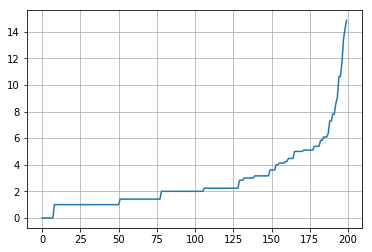

In [12]:
# how to estimate 2 DBSCAN's paramter
# for 2-dimensional data, use DBSCAN’s default value of min_samples = 4
# use NearestNeighbors to find the optimal value for epsilon 
# i.e. the point where the graph has the greatest slope

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(customer_data)
distances, indices = neighbors_fit.kneighbors(customer_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)

In [13]:
# in the k-distance plot, with min_samples =4, 
# it looks like the optimal value for ε is 5.5

model2 = DBSCAN(eps= 5.5, min_samples=4)
model2.fit(customer_data)

label_pred2 = model2.labels_
np.unique(label_pred2)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

There are -1 in the labels. These datapoints are considered anomalies by DBSCAN.

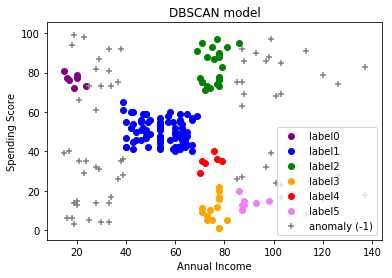

In [14]:
# Plot the clustering result 
x0 = customer_data[label_pred2 == 0]
x1 = customer_data[label_pred2 == 1]
x2 = customer_data[label_pred2 == 2]
x3 = customer_data[label_pred2 == 3]
x4 = customer_data[label_pred2 == 4]
x5 = customer_data[label_pred2 == 5]
x6 = customer_data[label_pred2 == -1]

plt.scatter(x0[:, 0], x0[:, 1], c="purple", label='label0') 
plt.scatter(x1[:, 0], x1[:, 1], c="blue", label='label1') 
plt.scatter(x2[:, 0], x2[:, 1], c="green", label='label2') 
plt.scatter(x3[:, 0], x3[:, 1], c="orange", label='label3')
plt.scatter(x4[:, 0], x4[:, 1], c="red", label='label4')
plt.scatter(x5[:, 0], x5[:, 1], c="violet", label='label5')
plt.scatter(x6[:, 0], x6[:, 1], c="grey", marker='+', label='anomaly (-1)')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("DBSCAN model")
plt.legend(loc=4) 
plt.show()

In [15]:
print("Score for using DBSCAN: \n", silhouette_score(customer_data, model2.labels_))

Score for using DBSCAN: 
 0.16676656079411487


# K-means clustering model

In [16]:
model3 = KMeans(n_clusters= 5, random_state = 42)
model3.fit(customer_data)

label_pred3 = model3.labels_ 
np.unique(label_pred3)

array([0, 1, 2, 3, 4])

Center of Cluster 0 : [25.72727273 79.36363636]
Center of Cluster 1 : [55.2962963  49.51851852]
Center of Cluster 2 : [86.53846154 82.12820513]
Center of Cluster 3 : [26.30434783 20.91304348]
Center of Cluster 4 : [88.2        17.11428571]


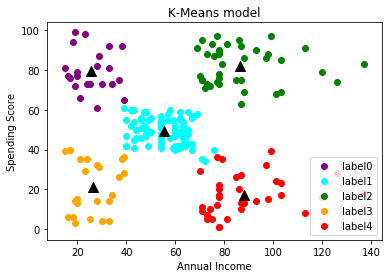

In [17]:
# plot the result with the cluster centers
# the centers are the black triangles
centroids = model3.cluster_centers_
for i in np.arange(len(centroids)):
    print("Center of Cluster", i, ":", centroids[i])

x0 = customer_data[label_pred3 == 0]
x1 = customer_data[label_pred3 == 1]
x2 = customer_data[label_pred3 == 2]
x3 = customer_data[label_pred3 == 3]
x4 = customer_data[label_pred3 == 4]

plt.scatter(x0[:, 0], x0[:, 1], c="purple", label='label0') 
plt.scatter(x1[:, 0], x1[:, 1], c="aqua", label='label1') 
plt.scatter(x2[:, 0], x2[:, 1], c="green", label='label2') 
plt.scatter(x3[:, 0], x3[:, 1], c="orange", label='label3')
plt.scatter(x4[:, 0], x4[:, 1], c="red", label='label4')
plt.scatter(model3.cluster_centers_[:, 0], 
            model3.cluster_centers_[:, 1], 
            marker = '^', s = 100, c = "black")

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("K-Means model")
plt.legend(loc=4) 
plt.show()

In [18]:
print("Score for K-Kmeans model: \n", silhouette_score(customer_data, model3.labels_))

Score for K-Kmeans model: 
 0.553931997444648
